In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el DataFrame (reemplazar con tu propio CSV o DataFrame cargado)
data = {
    'Fecha': ['20/11/2024', '20/11/2024', '21/11/2024', '21/11/2024', '22/11/2024', 
              '22/11/2024', '22/11/2024', '23/11/2024', '23/11/2024', '23/11/2024', 
              '24/11/2024', '24/11/2024', '25/11/2024', '25/11/2024', '26/11/2024', 
              '26/11/2024', '26/11/2024', '27/11/2024', '27/11/2024'],
    'Hora': ['19:00', '23:00', '17:40', '22:30', '06:00', 
             '18:00', '23:30', '10:34', '19:00', '23:50', 
             '12:20', '16:00', '18:00', '22:00', '06:00', 
             '20:00', '23:30', '10:30', '12:30'],
    'Sistólica': [130, 128, 128, 118, 110, 
                  128, 131, 118, 123, 130, 
                  119, 122, 121, 122, 115, 
                  121, 122, 127, 116],
    'Diastólica': [86, 87, 89, 76, 81, 
                   89, 83, 82, 89, 82, 
                   86, 77, 80, 80, 80, 
                   81, 81, 78, 80]
}
df = pd.DataFrame(data)

# Convertir Fecha y Hora a tipo datetime para facilitar el análisis
df['Datetime'] = pd.to_datetime(df['Fecha'] + ' ' + df['Hora'])

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


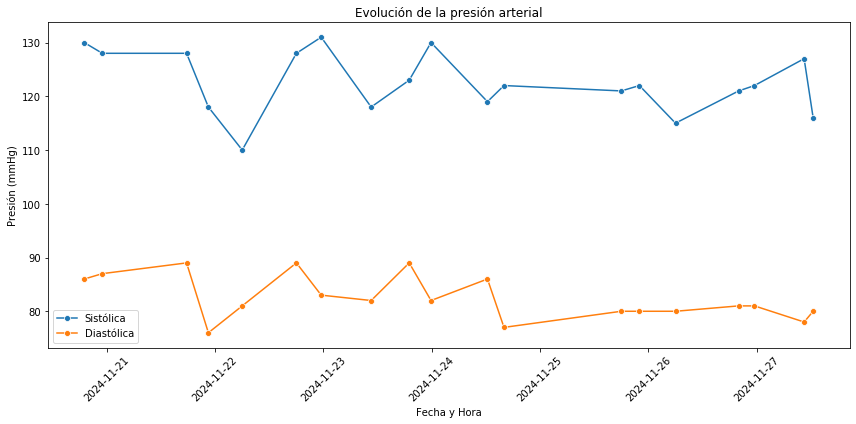

In [2]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Datetime', y='Sistólica', label='Sistólica', marker='o')
sns.lineplot(data=df, x='Datetime', y='Diastólica', label='Diastólica', marker='o')
plt.title('Evolución de la presión arterial')
plt.xlabel('Fecha y Hora')
plt.ylabel('Presión (mmHg)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

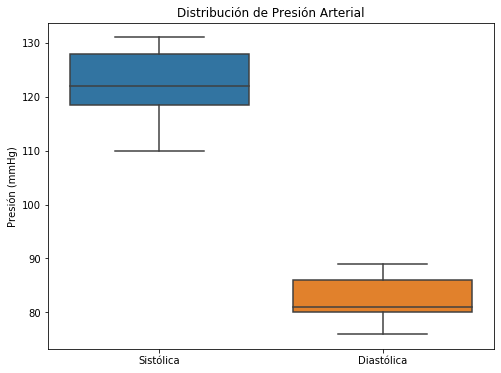

In [3]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Sistólica', 'Diastólica']])
plt.title('Distribución de Presión Arterial')
plt.ylabel('Presión (mmHg)')
plt.xticks([0, 1], ['Sistólica', 'Diastólica'])
plt.show()

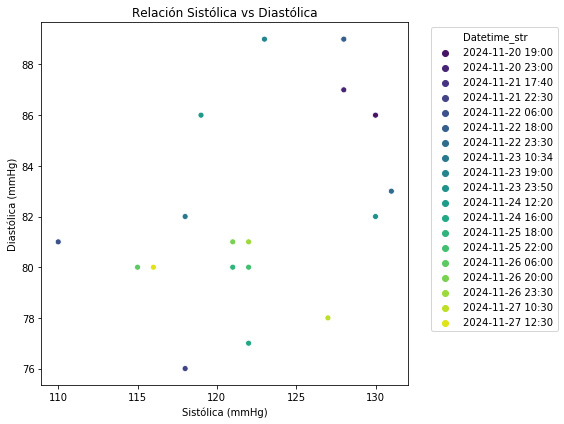

In [8]:
plt.figure(figsize=(8, 6))

# Convertir 'Datetime' a una cadena para usarlo como 'hue'
df['Datetime_str'] = df['Datetime'].dt.strftime('%Y-%m-%d %H:%M')

sns.scatterplot(data=df, x='Sistólica', y='Diastólica', hue='Datetime_str', palette='viridis')
plt.title('Relación Sistólica vs Diastólica')
plt.xlabel('Sistólica (mmHg)')
plt.ylabel('Diastólica (mmHg)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Mover la leyenda fuera del gráfico
plt.tight_layout()
plt.show()

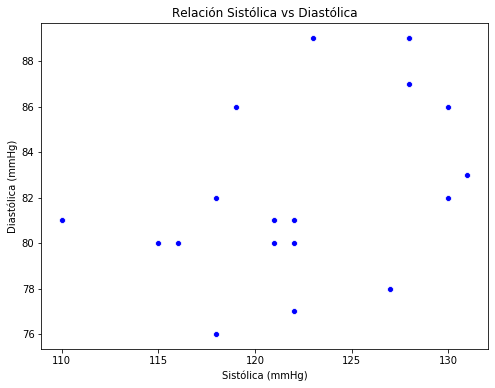

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Sistólica', y='Diastólica', color='blue')
plt.title('Relación Sistólica vs Diastólica')
plt.xlabel('Sistólica (mmHg)')
plt.ylabel('Diastólica (mmHg)')
plt.show()

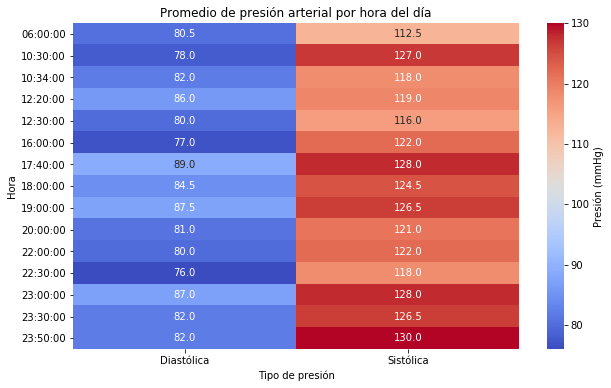

In [10]:
df['Hora'] = pd.to_datetime(df['Hora'], format='%H:%M').dt.time
pivot = df.pivot_table(index='Hora', values=['Sistólica', 'Diastólica'], aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='coolwarm', cbar_kws={'label': 'Presión (mmHg)'})
plt.title('Promedio de presión arterial por hora del día')
plt.ylabel('Hora')
plt.xlabel('Tipo de presión')
plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


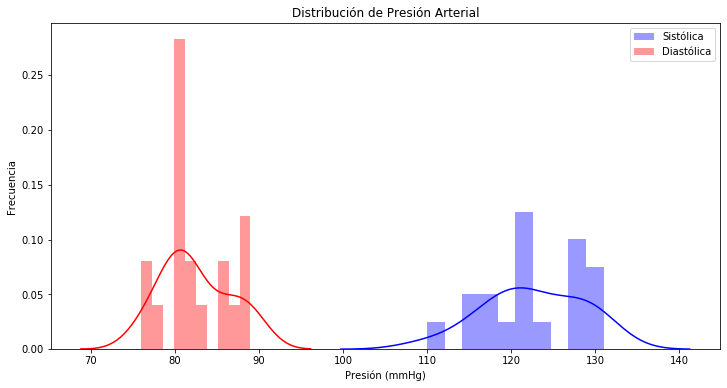

In [12]:
plt.figure(figsize=(12, 6))

# Histograma para Sistólica
sns.distplot(df['Sistólica'], kde=True, color='blue', label='Sistólica', bins=10)

# Histograma para Diastólica
sns.distplot(df['Diastólica'], kde=True, color='red', label='Diastólica', bins=10)

plt.title('Distribución de Presión Arterial')
plt.xlabel('Presión (mmHg)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [13]:
df

,Fecha,Hora,Sistólica,Diastólica,Datetime,Datetime_str
0,20/11/2024,19:00:00,130,86,2024-11-20 19:00:00,2024-11-20 19:00
1,20/11/2024,23:00:00,128,87,2024-11-20 23:00:00,2024-11-20 23:00
2,21/11/2024,17:40:00,128,89,2024-11-21 17:40:00,2024-11-21 17:40
3,21/11/2024,22:30:00,118,76,2024-11-21 22:30:00,2024-11-21 22:30
4,22/11/2024,06:00:00,110,81,2024-11-22 06:00:00,2024-11-22 06:00
5,22/11/2024,18:00:00,128,89,2024-11-22 18:00:00,2024-11-22 18:00
6,22/11/2024,23:30:00,131,83,2024-11-22 23:30:00,2024-11-22 23:30
7,23/11/2024,10:34:00,118,82,2024-11-23 10:34:00,2024-11-23 10:34
8,23/11/2024,19:00:00,123,89,2024-11-23 19:00:00,2024-11-23 19:00
9,23/11/2024,23:50:00,130,82,2024-11-23 23:50:00,2024-11-23 23:50
